# 00 - Intro: Data Analyst Case Ifood


https://github.com/ifood/ifood-data-analyst-case

Queremos entender:

* que tipo de usuário aceita "na primeira", segunda, terceira oferta, etc.
* tratar as informações e tirar insights

Segundo passo (preditivo)
* se formos mandar uma nova campanha, para qual público seria melhor enviarmos? 
* mais adiante queremos saber qual é o melhor grupo para enviar uma campanha




## Do PDF, temos:


1. Qtdade de clientes: "de 100 a 900 mil usuários registrados".
2. Atendem aprox 1 milhão de usuários por ano.
3. Produtos em 5 principais categorias (sendo separados posteriormente em 'gold and regular products'): 
    * 'wines, 
    * rare meat products, 
    * exotic fruits, 
    * specially prepared fish and 
    * sweet products '
4. Canais de compra: 3 sales channels: physical stores, catalogs and the company’s website.
5. Contexto do problema:
    * "Globally, the company had solid revenues and a healthy bottom line in the past 3 years, but 
        * the profit growth perspectives for the next 3 years are not promising... 
        For this reason, several strategic initiatives are being considered to invert this situation. 
            * One is to **improve the performance of marketing activities**, with a special focus on marketing campaigns."

**OBJETIVO:**
* Criar uma análise para retornar o melhor lucro, na campanha do próximo mês. 
* Campanha piloto (oferece a venda de um gadget para compra):
    * 2240 customers
    * valor total da campanha: 6720MU
    * receita gerada pelos clientes que aceitaram a oferta: 3674MU
    * lucro líquido = -3046MU
    * taxa de sucesso: 15%


# 01 -  Inicio

In [69]:
import numpy as np 
import seaborn as sns
import pandas as pd
from datetime import datetime
pd.options.display.max_rows=100
pd.options.display.max_columns=100

In [70]:
df = pd.read_csv('/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/data/raw/retail_case_data.csv')

# 02 - Explorando df

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Procurando por nulos

In [72]:
df.isnull().sum().sort_values(ascending=False)
#temos 24 elementos nulos em 'Income'

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

## Vamos criar uma regressão para preencher os dados faltantes no campo "income"

In [73]:
print('Mínimo: ', df['Income'].min())
print('Média: ', df['Income'].mean())
print('Máximo: ', df['Income'].max())

Mínimo:  1730.0
Média:  52247.25135379061
Máximo:  666666.0


Plotando boxplot para 'Income'

<AxesSubplot:xlabel='Income'>

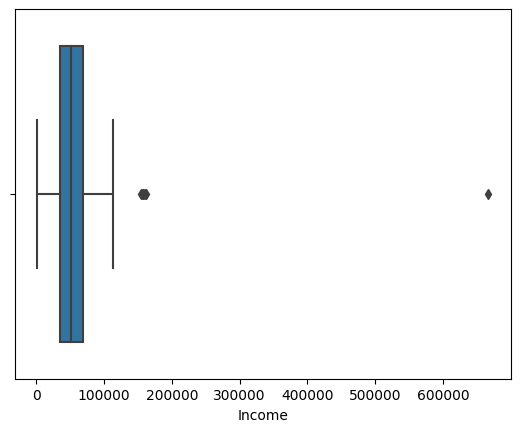

In [74]:

ax = sns.boxplot(x = 'Income', data = df)
ax

In [75]:
df.sort_values('Income', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,5079,1971,Graduation,Married,NaN,1,1,2013-03-03,82,71,1,16,0,0,9,4,2,1,3,8,0,0,0,0,0,0,3,11,0
2079,10339,1954,Master,Together,NaN,0,1,2013-06-23,83,161,0,22,0,0,24,2,4,1,4,6,0,0,0,0,0,0,3,11,0
2081,3117,1955,Graduation,Single,NaN,0,1,2013-10-18,95,264,0,21,12,6,147,3,6,1,5,7,0,0,0,0,0,0,3,11,0
2084,5250,1943,Master,Widow,NaN,0,0,2013-10-30,75,532,126,490,164,126,126,1,5,5,11,1,0,0,1,0,0,0,3,11,1


In [76]:
# Iremos eliminar a observação com o outlier de salário "exorbitante"

In [77]:
#removido diretamente através do índice:
df.drop(2233, inplace=True)

In [78]:
df.head(20).sort_values('Income', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
12,2125,1959,Graduation,Divorced,63033.0,0,0,2013-11-15,82,194,61,480,225,112,30,1,3,4,8,2,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
13,8180,1952,Master,Divorced,59354.0,1,1,2013-11-15,53,233,2,53,3,5,14,3,6,1,5,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0


## Criando coluna de renda mensal: 'IncomeMonth'

In [79]:
df['IncomeMonth']=df['Income']/12

In [80]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'IncomeMonth'],
      dtype='object')

## Adicionando colunas extras

## TotAcceptedCmp

In [81]:
# total campanhas aceitas: TotAcceptedCmp
df['TotAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [82]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,IncomeMonth,TotAcceptedCmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,4844.833333,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3862.000000,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,5967.750000,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2220.500000,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,4857.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,5101.916667,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,5334.500000,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,4748.416667,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,5770.416667,0


## Age

Considerando a data mais recente do registro do cliente no sistema como a data de quando df foi gerado, iremos estimar a idade do cliente:

In [83]:
df['Dt_Customer'].max()

'2014-06-29'

In [84]:
df['Age'] = 2014 - df['Year_Birth']

In [85]:
df.drop(columns=['Year_Birth'], inplace=True)

## Days_Registered

In [86]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%Y-%m-%d")

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2239 non-null   int64         
 1   Education            2239 non-null   object        
 2   Marital_Status       2239 non-null   object        
 3   Income               2215 non-null   float64       
 4   Kidhome              2239 non-null   int64         
 5   Teenhome             2239 non-null   int64         
 6   Dt_Customer          2239 non-null   datetime64[ns]
 7   Recency              2239 non-null   int64         
 8   MntWines             2239 non-null   int64         
 9   MntFruits            2239 non-null   int64         
 10  MntMeatProducts      2239 non-null   int64         
 11  MntFishProducts      2239 non-null   int64         
 12  MntSweetProducts     2239 non-null   int64         
 13  MntGoldProds         2239 non-nul

In [88]:
df["Days_Registered"] = (df["Dt_Customer"].max() - df["Dt_Customer"]).dt.days

In [89]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'IncomeMonth',
       'TotAcceptedCmp', 'Age', 'Days_Registered'],
      dtype='object')

## Eliminando colunas com valores constantes

In [90]:
df["Z_Revenue"].value_counts()

11    2239
Name: Z_Revenue, dtype: int64

In [91]:
df["Z_CostContact"].value_counts()

3    2239
Name: Z_CostContact, dtype: int64

In [92]:
df.drop(columns=["Z_Revenue", "Z_CostContact"], inplace=True)

In [93]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'IncomeMonth', 'TotAcceptedCmp', 'Age',
       'Days_Registered'],
      dtype='object')

# 03 -  Preenchendo elementos faltantes em Income

In [94]:
# armazenando elementos eliminando os nulos de "Income"
dfTreino = df[~df['Income'].isnull()]
dfEstimar = df[df['Income'].isnull()]

Mostrando correlação dos elementos com a variável "Income"

In [95]:
dfTreino.corr()['Income'].sort_values()

NumWebVisitsMonth     -0.650564
Kidhome               -0.514935
NumDealsPurchases     -0.108457
Complain              -0.030583
Days_Registered       -0.024126
AcceptedCmp3          -0.015286
ID                     0.000064
Recency                0.006945
Teenhome               0.034363
AcceptedCmp2           0.103909
Response               0.161049
Age                    0.198064
AcceptedCmp4           0.219337
AcceptedCmp1           0.327167
TotAcceptedCmp         0.366384
MntGoldProds           0.389204
AcceptedCmp5           0.396571
NumWebPurchases        0.458812
MntFruits              0.507959
MntFishProducts        0.520351
MntSweetProducts       0.523746
NumStorePurchases      0.630397
MntWines               0.688269
MntMeatProducts        0.692465
NumCatalogPurchases    0.696541
IncomeMonth            1.000000
Income                 1.000000
Name: Income, dtype: float64

Aplicando filtro para obter somente aqueles com correlação superior a '0.5'

In [96]:
dfTreino.corr()['Income'][(dfTreino.corr()['Income'] > 0.5) | (dfTreino.corr()['Income'] < -0.5)].sort_values()

#df.corr()['Response'][(df.corr()['Response'] > .15) | (df.corr()['Response'] < -.15)].sort_values(ascending = False)

NumWebVisitsMonth     -0.650564
Kidhome               -0.514935
MntFruits              0.507959
MntFishProducts        0.520351
MntSweetProducts       0.523746
NumStorePurchases      0.630397
MntWines               0.688269
MntMeatProducts        0.692465
NumCatalogPurchases    0.696541
IncomeMonth            1.000000
Income                 1.000000
Name: Income, dtype: float64

In [97]:
# Gerando grafico de correlação:
dfTreino[['NumWebVisitsMonth', 'Kidhome', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'NumStorePurchases', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'Income']].corr()


,NumWebVisitsMonth,Kidhome,MntFruits,MntFishProducts,MntSweetProducts,NumStorePurchases,MntWines,MntMeatProducts,NumCatalogPurchases,Income
NumWebVisitsMonth,1.000000,0.447462,-0.418706,-0.446392,-0.422336,-0.432369,-0.321928,-0.539464,-0.521979,-0.650564
Kidhome,0.447462,1.000000,-0.373350,-0.388751,-0.377855,-0.501151,-0.497132,-0.439100,-0.504393,-0.514935
MntFruits,-0.418706,-0.373350,1.000000,0.593407,0.571581,0.458457,0.386977,0.547796,0.486229,0.507959
MntFishProducts,-0.446392,-0.388751,0.593407,1.000000,0.583804,0.457641,0.397602,0.573507,0.532692,0.520351
MntSweetProducts,-0.422336,-0.377855,0.571581,0.583804,1.000000,0.455096,0.390178,0.535048,0.495054,0.523746
NumStorePurchases,-0.432369,-0.501151,0.458457,0.457641,0.455096,1.000000,0.639889,0.485877,0.517743,0.630397
MntWines,-0.321928,-0.497132,0.386977,0.397602,0.390178,0.639889,1.000000,0.568752,0.634684,0.688269
MntMeatProducts,-0.539464,-0.439100,0.547796,0.573507,0.535048,0.485877,0.568752,1.000000,0.734082,0.692465
NumCatalogPurchases,-0.521979,-0.504393,0.486229,0.532692,0.495054,0.517743,0.634684,0.734082,1.000000,0.696541
Income,-0.650564,-0.514935,0.507959,0.520351,0.523746,0.630397,0.688269,0.692465,0.696541,1.000000


<AxesSubplot:>

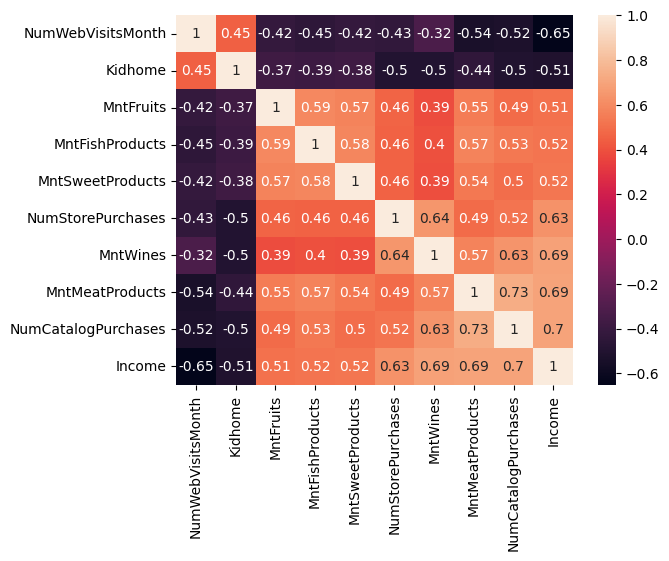

In [98]:

#Podemos gerar um mapa de calor com o Seaborn
sns.heatmap(dfTreino[['NumWebVisitsMonth', 'Kidhome', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'NumStorePurchases', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'Income']].corr()
, annot = True)


# 04 - Regressão Linear:

In [99]:
# Importando biblioteca para regressão linear e divisão de treino e teste
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [100]:
lr = LinearRegression()

In [101]:
list_indenpedent_variables = ['NumWebVisitsMonth', 'Kidhome', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'NumStorePurchases', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases']

In [102]:
X = dfTreino[['NumWebVisitsMonth', 'Kidhome', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'NumStorePurchases', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases']]
Y = dfTreino['Income']

Testando variáveis uma a uma.

In [103]:
def linear_regression_model(variable, x_train, y_train, x_test):
  lr = LinearRegression()
  lr.fit(x_train, y_train)
  yHat = lr.predict(x_test)
  print(variable)
  print('a:', lr.coef_, 'b:', lr.intercept_)
  print('Treino: ', lr.score(x_train, y_train))
  return yHat
  
def evaluate_model(variable, yHat, y_test):
  r2 = r2_score(y_test, yHat)
  print('R2 Score: ', r2)

  mae = mean_absolute_error(y_test, yHat)
  print('MAE: ', mae)

  mse = mean_squared_error(y_test, yHat)
  print('MSE: ', mse)

  rmse = sqrt(mse)
  print('RMSE: ', rmse)

def pipeline_regression(variable, X, Y):
  X = dfTreino[[variable]]
  Y = dfTreino[['Income']]
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42 )
  yHat = linear_regression_model(variable,x_train, y_train, x_test)
  print('\nAvaliação da performance do modelo de regressão:')
  evaluate_model(variable, yHat, y_test)
  print('---------------------------\n')

In [104]:
for variable in list_indenpedent_variables:
  pipeline_regression(variable, X, Y)

NumWebVisitsMonth
a: [-5788.59328188] b: 83011.90697695586
Treino:  0.43133497985530467

Avaliação da performance do modelo de regressão:
R2 Score:  0.4048040173457921
MAE:  12900.155323158358
MSE:  287313289.5245816
RMSE:  16950.318272073288
---------------------------

Kidhome
a: [-20276.43207995] b: 60968.24485040478
Treino:  0.2632551091057438

Avaliação da performance do modelo de regressão:
R2 Score:  0.26881178283037377
MAE:  14334.12123974243
MSE:  352959526.0367712
RMSE:  18787.217091330243
---------------------------

MntFruits
a: [264.04034529] b: 44971.86059806432
Treino:  0.2521876004229797

Avaliação da performance do modelo de regressão:
R2 Score:  0.26933547866773866
MAE:  14796.397444591532
MSE:  352706727.3315906
RMSE:  18780.487941786567
---------------------------

MntFishProducts
a: [199.37961244] b: 44574.05827833283
Treino:  0.25975258332777007

Avaliação da performance do modelo de regressão:
R2 Score:  0.29406856819266813
MAE:  14588.431839817134
MSE:  34076755

Avaliando os resultados apresentados, identificamos as variáveis "MntWines" e "NumCatalogPurchases" como as que têm melhor resultado (R2).

Então iremos partir para uma regressão linear com múltiplas variáveis.

## Regressão linear Múltiplas variáveis:

In [105]:
import matplotlib.pyplot as plt

In [106]:
X = dfTreino[['NumWebVisitsMonth', 'Kidhome', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'NumStorePurchases', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases']]
Y = dfTreino['Income']

Funções:

In [113]:
def linear_regression_model(x_train, y_train, x_test):
  lr = LinearRegression()
  lr.fit(x_train, y_train)
  yHat = lr.predict(x_test)
  print('a:', lr.coef_, 'b:', lr.intercept_)
  print('Treino: ', lr.score(x_train, y_train))
  return yHat
  
def evaluate_model(yHat, y_test):
  r2 = r2_score(y_test, yHat)
  print('R2 Score: ', r2)

  mae = mean_absolute_error(y_test, yHat)
  print('MAE: ', mae)

  mse = mean_squared_error(y_test, yHat)
  print('MSE: ', mse)

  rmse = sqrt(mse)
  print('RMSE: ', rmse)

  ax = sns.distplot(y_test, hist=False, label='Valor real' )
  sns.distplot(yHat, color='r', hist=False, label='Valor estimado' )
  plt.show()   

  sns.residplot(y_test, yHat)
  plt.title('Residuals')
  plt.show()

def pipeline_regression(X, y):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
  yHat = linear_regression_model(x_train, y_train, x_test)
  print('\nAvaliação da performance do modelo de regressão:')
  evaluate_model(yHat, y_test)


a: [-2867.21928253    96.27069983     9.08533872    -7.17308172
    34.65497578   676.61996607    19.35597015    16.67470055
   954.19100885] b: 51197.103591680316
Treino:  0.7354459185331849

Avaliação da performance do modelo de regressão:
R2 Score:  0.714687795714775
MAE:  8174.029781439606
MSE:  137726043.76317167
RMSE:  11735.673979928535


/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


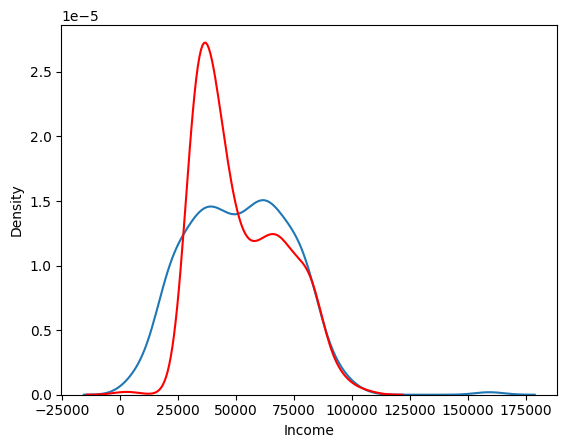

/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


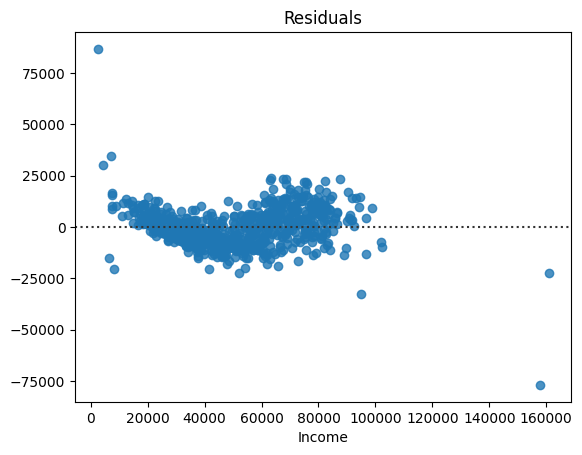

In [114]:
pipeline_regression(X, Y)

Identificamos pelo gráfico de distribuição residual que os dados convergem para um ponto. Parece formar uma curva?

# 05 - Regressão polinomial

In [120]:
from sklearn.preprocessing import PolynomialFeatures

In [121]:
def aplica_polynomial(x_train, x_test, grau=2):
  pf = PolynomialFeatures(degree=grau)
  x_train_pf = pf.fit_transform(x_train)
  x_test = pf.transform(x_test)
  return x_train_pf, x_test

def aplica_modelo(x_train, y_train, x_test):
  lr = LinearRegression()
  lr.fit(x_train, y_train)
  yhat = lr.predict(x_test)
  print('Treino: ', lr.score(x_train, y_train))
  return yhat

def evaluate_model(yHat, y_test):
  r2 = r2_score(y_test, yHat)
  print('R2 Score: ', r2)

  mae = mean_absolute_error(y_test, yHat)
  print('MAE: ', mae)

  mse = mean_squared_error(y_test, yHat)
  print('MSE: ', mse)

  ax = sns.distplot(y_test, hist=False, label='Valor real' )
  sns.distplot(yHat, color='r', hist=False, label='Valor estimado' )
  plt.show()   

  sns.residplot(y_test, yHat)
  plt.title('Residuals')
  plt.show()

def Pipeline_Regressao(X, Y, grau=2):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=42 )
  x_train_pf, x_test_pf = aplica_polynomial(x_train, x_test, grau)
  yHat = aplica_modelo(x_train_pf, y_train, x_test_pf)
  print('Resultados Polinomial Grau:', grau)
  print('\nResultado Conjunto de Teste:')
  evaluate_model(yHat, y_test)
  print('---------------------------\n')
  

In [122]:
X = dfTreino[['NumWebVisitsMonth', 'Kidhome', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'NumStorePurchases', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases']]
Y = dfTreino['Income']

Treino:  0.7354459185331849
Resultados Polinomial Grau: 1

Resultado Conjunto de Teste:
R2 Score:  0.7146877957147756
MAE:  8174.02978143959
MSE:  137726043.76317143


/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


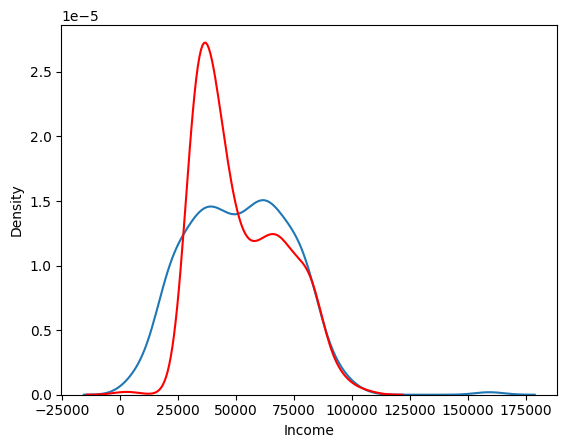

/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


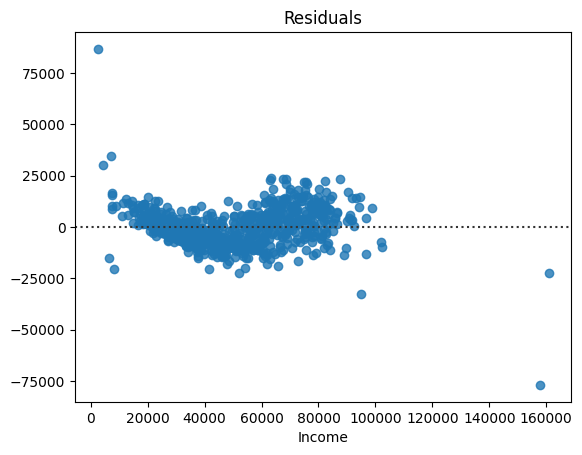

---------------------------

Treino:  0.8052227413867032
Resultados Polinomial Grau: 2

Resultado Conjunto de Teste:
R2 Score:  0.7104525622402432
MAE:  7498.118796365709
MSE:  139770477.69238943


/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


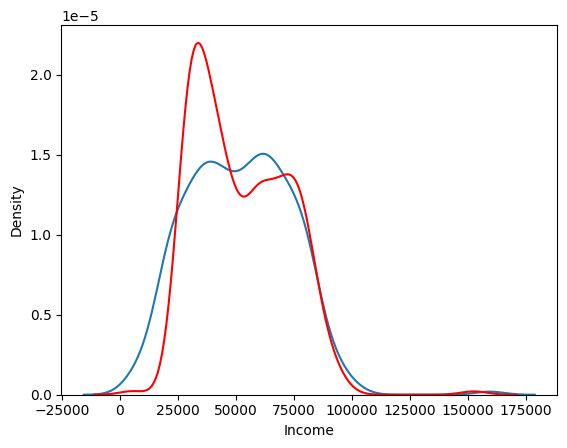

/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


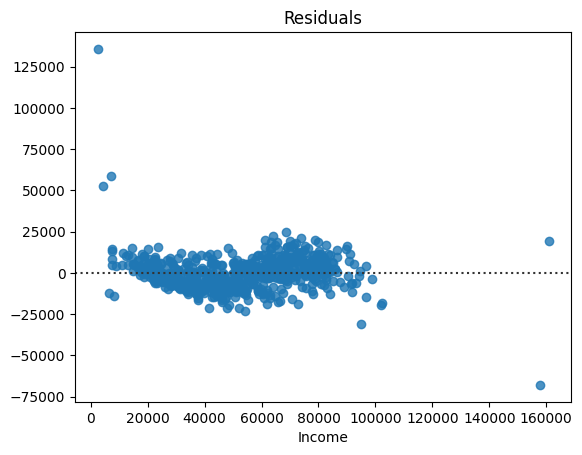

---------------------------

Treino:  0.8740871842618692
Resultados Polinomial Grau: 3

Resultado Conjunto de Teste:
R2 Score:  -9.140090003850508
MAE:  10705.789780166991
MSE:  4894829098.290823


/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


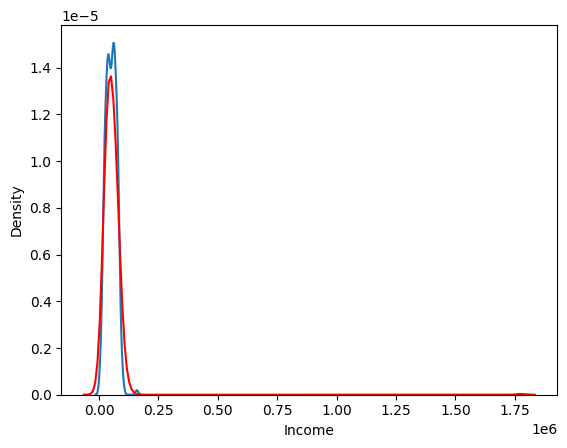

/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


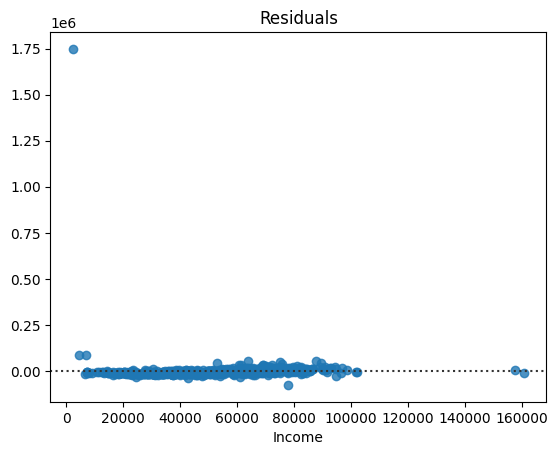

---------------------------



In [123]:
for i in range(1, 4):
  Pipeline_Regressao(X, Y, i)